[View in Colaboratory](https://colab.research.google.com/github/eurismarpires/colab_test/blob/master/python_midi.ipynb)

**Download midi e instalação do Python Midi**

In [1]:
!ls

datalab


In [2]:
!git clone https://github.com/llSourcell/Music_Generator_Demo.git

Cloning into 'Music_Generator_Demo'...
remote: Counting objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (218/218), 66.15 KiB | 6.62 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [3]:
!ls

datalab  Music_Generator_Demo


In [4]:
!pip install python-midi

  Running setup.py bdist_wheel for python-midi ... - done
  Stored in directory: /content/.cache/pip/wheels/98/7a/2d/25a0047a3aac9bfa40e897f8ff565a1f0f2aab2eb2232ca4df
Successfully built python-midi


In [5]:
!ls

datalab  Music_Generator_Demo


## links uteis
### https://www.dataquest.io/blog/pandas-python-tutorial/
### https://blogs.technet.microsoft.com/machinelearning/2017/12/06/music-generation-with-azure-machine-learning/
### https://github.com/vishnubob/python-midi
### https://github.com/llSourcell/Music_Generator_Demo/blob/master/midi_manipulation.py

In [0]:
import pandas as pd

In [0]:
import midi

In [0]:
midifile = 'Music_Generator_Demo/Pop_Music_Midi/Beautiful Life - Chorus.midi'

In [195]:
!ls Music_Generator_Demo/Pop_Music_Midi/Beautiful\ Life\ -\ Chorus.midi

Music_Generator_Demo/Pop_Music_Midi/Beautiful Life - Chorus.midi


In [0]:
#Music_Generator_Demo/Pop_Music_Midi/Beautiful\ Life\ -\ Chorus.midi

In [0]:
pattern = midi.read_midifile(midifile)

In [198]:
pattern

midi.Pattern(format=1, resolution=128, tracks=\
[midi.Track(\
  [midi.SetTempoEvent(tick=0, data=[7, 161, 32]),
   midi.TrackNameEvent(tick=0, text='\x00', data=[0]),
   midi.TimeSignatureEvent(tick=0, data=[4, 2, 24, 8]),
   midi.KeySignatureEvent(tick=0, data=[0, 0]),
   midi.ProgramChangeEvent(tick=0, channel=0, data=[1]),
   midi.NoteOnEvent(tick=64, channel=1, data=[62, 102]),
   midi.NoteOffEvent(tick=63, channel=1, data=[62, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[65, 102]),
   midi.NoteOffEvent(tick=63, channel=1, data=[65, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[67, 102]),
   midi.NoteOffEvent(tick=63, channel=1, data=[67, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[69, 102]),
   midi.NoteOffEvent(tick=63, channel=1, data=[69, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=63, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=63, channel=1, data=[60,

In [199]:
pattern.format

1

In [200]:
pattern.resolution

128

# The resolution is the number of pulses, or ticks, per quarter note (PPQ)

In [201]:
len(pattern) # numero de canais

3

In [202]:
len(pattern[0]) # numero de eventos canal 1

60

In [203]:
pattern[0][0]

midi.SetTempoEvent(tick=0, data=[7, 161, 32])

In [204]:
pattern[0][1]

midi.TrackNameEvent(tick=0, text='\x00', data=[0])

In [205]:
pattern[0][2]

midi.TimeSignatureEvent(tick=0, data=[4, 2, 24, 8])

In [206]:
track = 0
tick = []
channel = []
data = []
name = []
tipo = []
data_0 = []
tick_acum = []
acum = 0
for evt in pattern[track]:
    if isinstance(evt, midi.NoteEvent):
      tick.append(evt.tick)
      channel.append(evt.channel)
      data.append(evt.data)
      name.append(evt.name)
      if evt.name=='Note On':
        tipo.append(1)
      else:
        tipo.append(0)
      data_0.append(evt.data[0])
      acum = acum + evt.tick
      tick_acum.append(acum)
    
df = pd.DataFrame(
    {'tick':tick,
     'channel':channel,
     'data':data,
     'data_0':data_0,
     'name':name,
     'tipo':tipo,
     'tick_acum':tick_acum
    }
)
df.head(10)

,channel,data,data_0,name,tick,tick_acum,tipo
0,1,"[62, 102]",62,Note On,64,64,1
1,1,"[62, 90]",62,Note Off,63,127,0
2,1,"[65, 102]",65,Note On,1,128,1
3,1,"[65, 90]",65,Note Off,63,191,0
4,1,"[67, 102]",67,Note On,1,192,1
5,1,"[67, 90]",67,Note Off,63,255,0
6,1,"[69, 102]",69,Note On,1,256,1
7,1,"[69, 90]",69,Note Off,63,319,0
8,1,"[60, 102]",60,Note On,1,320,1
9,1,"[60, 90]",60,Note Off,63,383,0


In [0]:
def getTrack(track=0):
    tick = []
    channel = []
    data = []
    name = []
    data_0 = []
    tick_acum = []
    tipo = []
    acum = 0
    for evt in pattern[track]:
        if isinstance(evt, midi.NoteEvent):
          tick.append(evt.tick)
          channel.append(evt.channel)
          data.append(evt.data)
          name.append(evt.name)
          if evt.name=='Note On':
            tipo.append(1)
          else:
            tipo.append(0)
          data_0.append(evt.data[0])
          acum = acum + evt.tick
          tick_acum.append(acum)
    
    df = pd.DataFrame(
        {'tick':tick,
         'channel':channel,
         'data':data,
         'data_0':data_0,
         'name':name,
         'tipo':tipo,
         'tick_acum':tick_acum
        }
    )
    return df

In [208]:
getTrack(0).head()

,channel,data,data_0,name,tick,tick_acum,tipo
0,1,"[62, 102]",62,Note On,64,64,1
1,1,"[62, 90]",62,Note Off,63,127,0
2,1,"[65, 102]",65,Note On,1,128,1
3,1,"[65, 90]",65,Note Off,63,191,0
4,1,"[67, 102]",67,Note On,1,192,1


In [209]:
getTrack(1).head()

,channel,data,data_0,name,tick,tick_acum,tipo
0,2,"[62, 81]",62,Note On,0,0,1
1,2,"[65, 81]",65,Note On,0,0,1
2,2,"[57, 81]",57,Note On,0,0,1
3,2,"[57, 90]",57,Note Off,126,126,0
4,2,"[62, 90]",62,Note Off,0,126,0


In [210]:
getTrack(2).head()

,channel,data,data_0,name,tick,tick_acum,tipo
0,3,"[50, 81]",50,Note On,0,0,1
1,3,"[50, 90]",50,Note Off,190,190,0
2,3,"[50, 59]",50,Note On,2,192,1
3,3,"[50, 90]",50,Note Off,60,252,0
4,3,"[41, 81]",41,Note On,4,256,1


In [0]:
df = getTrack(0)

In [0]:
df1 = df[['data_0','tipo','tick']]

In [0]:
%matplotlib inline

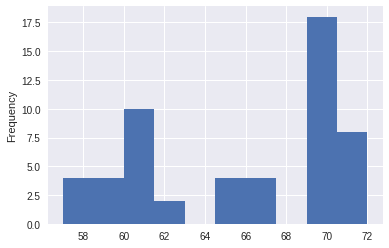

In [214]:
df['data_0'].plot(kind="hist")

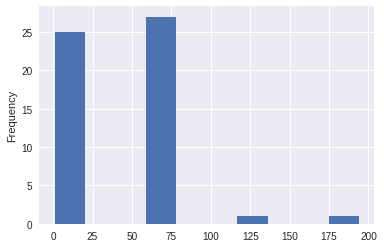

In [215]:
df['tick'].plot(kind="hist")

In [216]:
df1.head()

,data_0,tipo,tick
0,62,1,64
1,62,0,63
2,65,1,1
3,65,0,63
4,67,1,1


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
raw_midi = scaler.fit_transform(df1)

In [219]:
raw_midi

array([[-0.68570459,  1.        ,  0.66461902],
       [-0.68570459, -1.        ,  0.63914746],
       [-0.07535215,  1.        , -0.94008921],
       [-0.07535215, -1.        ,  0.63914746],
       [ 0.33154947,  1.        , -0.94008921],
       [ 0.33154947, -1.        ,  0.63914746],
       [ 0.73845109,  1.        , -0.94008921],
       [ 0.73845109, -1.        ,  0.63914746],
       [-1.09260621,  1.        , -0.94008921],
       [-1.09260621, -1.        ,  0.63914746],
       [-1.09260621,  1.        , -0.94008921],
       [-1.09260621, -1.        ,  0.63914746],
       [-1.09260621,  1.        , -0.94008921],
       [-1.09260621, -1.        ,  0.63914746],
       [-1.29605702,  1.        , -0.94008921],
       [-1.29605702, -1.        ,  0.63914746],
       [-1.09260621,  1.        , -0.94008921],
       [-1.09260621, -1.        ,  0.63914746],
       [-1.29605702,  1.        , -0.94008921],
       [-1.29605702, -1.        ,  0.63914746],
       [-1.70295864,  1.        , -0.940

In [220]:
raw_midi.shape

(54, 3)

In [231]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 20
dataX = []
dataY = []
for i in range(0, raw_midi.shape[0] - seq_length, 1):
	seq_in = raw_midi[i:i + seq_length]
	seq_out = raw_midi[i + seq_length]
	dataX.append(seq_in)
	dataY.append(seq_out)
n_patterns = len(dataX)
print "Total Patterns: ", n_patterns

Total Patterns:  34


In [0]:
import numpy as np

In [0]:
X = np.reshape(dataX, (len(dataX), seq_length, 3))

In [0]:
y = np.reshape(dataY, (len(dataY), 3))

In [235]:
X.shape

(34, 20, 3)

In [236]:
y.shape

(34, 3)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM,BatchNormalization,Dropout,RepeatVector,TimeDistributed, Dense
from keras import optimizers
from keras.callbacks import EarlyStopping, History
from keras.models import model_from_json

In [346]:
# define model
model = Sequential()
model.add(LSTM(256, input_shape=(seq_length, 3),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(3, activation='tanh'))
adam = optimizers.Adam(lr=0.001)
model.compile(loss='mae', optimizer=adam,metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 20, 256)           266240    
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 256)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 771       
Total params: 792,323
Trainable params: 792,323
Non-trainable params: 0
_________________________________________________________________
None


In [347]:
history = model.fit(X, y, epochs=300,batch_size=32, verbose=1, shuffle=False)

Epoch 1/300
34/34 [==============================] - 2s 64ms/step - loss: 0.9593 - acc: 0.1176
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 0.8878 - acc: 0.6176
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 0.8603 - acc: 0.5588
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 0.8579 - acc: 0.5588
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 0.8220 - acc: 0.5882
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 0.7822 - acc: 0.6471
Epoch 7/300
34/34 [==============================] - 0s 6ms/step - loss: 0.7688 - acc: 0.6471
Epoch 8/300
34/34 [==============================] - 0s 6ms/step - loss: 0.7562 - acc: 0.6176
Epoch 9/300
34/34 [==============================] - 0s 6ms/step - loss: 0.7644 - acc: 0.6176
Epoch 10/300
34/34 [==============================] - 0s 6ms/step - loss: 0.7523 - acc: 0.6765
Epoch 11/300
34/34 [==============================] - 0s 5

34/34 [==============================] - 0s 6ms/step - loss: 0.5441 - acc: 0.7059
Epoch 27/300
34/34 [==============================] - 0s 6ms/step - loss: 0.4205 - acc: 0.7353
Epoch 28/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3949 - acc: 0.7059
Epoch 29/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3756 - acc: 0.6176
Epoch 30/300
34/34 [==============================] - 0s 6ms/step - loss: 0.4338 - acc: 0.9118
Epoch 31/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3619 - acc: 0.8529
Epoch 32/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3697 - acc: 0.6471
Epoch 33/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3729 - acc: 0.5588
Epoch 34/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3536 - acc: 0.8529
Epoch 35/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3471 - acc: 0.6765
Epoch 36/300
34/34 [==============================] - 0s 6ms/st

34/34 [==============================] - 0s 6ms/step - loss: 0.3232 - acc: 0.8235
Epoch 52/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3125 - acc: 0.8824
Epoch 53/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3079 - acc: 0.9118
Epoch 54/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3051 - acc: 0.8824
Epoch 55/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2923 - acc: 0.8824
Epoch 56/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2980 - acc: 0.9118
Epoch 57/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2990 - acc: 0.9412
Epoch 58/300
34/34 [==============================] - 0s 5ms/step - loss: 0.3464 - acc: 0.9412
Epoch 59/300
34/34 [==============================] - 0s 6ms/step - loss: 0.3197 - acc: 0.8235
Epoch 60/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2305 - acc: 0.8824
Epoch 61/300
34/34 [==============================] - 0s 6ms/st

34/34 [==============================] - 0s 6ms/step - loss: 0.2307 - acc: 0.9118
Epoch 78/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2389 - acc: 0.8529
Epoch 79/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2468 - acc: 0.9118
Epoch 80/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2515 - acc: 0.8824
Epoch 81/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2426 - acc: 0.8824
Epoch 82/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2684 - acc: 0.9118
Epoch 83/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2631 - acc: 0.9118
Epoch 84/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2447 - acc: 0.8824
Epoch 85/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2384 - acc: 0.9118
Epoch 86/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2453 - acc: 0.7647
Epoch 87/300
34/34 [==============================] - 0s 5ms/st

34/34 [==============================] - 0s 6ms/step - loss: 0.2362 - acc: 0.8824
Epoch 104/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2430 - acc: 0.8824
Epoch 105/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2457 - acc: 0.8529
Epoch 106/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2327 - acc: 0.7059
Epoch 107/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2304 - acc: 0.6765
Epoch 108/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2393 - acc: 0.7647
Epoch 109/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2322 - acc: 0.8824
Epoch 110/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2498 - acc: 0.8529
Epoch 111/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2278 - acc: 0.8824
Epoch 112/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2224 - acc: 0.9118
Epoch 113/300
34/34 [==============================] -

Epoch 129/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2246 - acc: 0.8529
Epoch 130/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2330 - acc: 0.8824
Epoch 131/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2296 - acc: 0.8824
Epoch 132/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2231 - acc: 0.9118
Epoch 133/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2352 - acc: 0.8824
Epoch 134/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2211 - acc: 0.8824
Epoch 135/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2197 - acc: 0.9118
Epoch 136/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2193 - acc: 0.8824
Epoch 137/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2201 - acc: 0.8529
Epoch 138/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2167 - acc: 0.9118
Epoch 139/300
34/34 [===================

Epoch 155/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2101 - acc: 0.9118
Epoch 156/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2152 - acc: 0.9118
Epoch 157/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2114 - acc: 0.9118
Epoch 158/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2091 - acc: 0.8824
Epoch 159/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2017 - acc: 0.8824
Epoch 160/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2020 - acc: 0.8529
Epoch 161/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2061 - acc: 0.8235
Epoch 162/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2108 - acc: 0.7941
Epoch 163/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2111 - acc: 0.8529
Epoch 164/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2038 - acc: 0.9118
Epoch 165/300
34/34 [===================

34/34 [==============================] - 0s 6ms/step - loss: 0.2219 - acc: 0.8235
Epoch 181/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2017 - acc: 0.8824
Epoch 182/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2038 - acc: 0.9118
Epoch 183/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2123 - acc: 0.8824
Epoch 184/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2041 - acc: 0.9118
Epoch 185/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2076 - acc: 0.9118
Epoch 186/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2057 - acc: 0.9118
Epoch 187/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1960 - acc: 0.8529
Epoch 188/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2049 - acc: 0.8235
Epoch 189/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2054 - acc: 0.7059
Epoch 190/300
34/34 [==============================] -

Epoch 206/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2342 - acc: 0.8529
Epoch 207/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2343 - acc: 0.7941
Epoch 208/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2246 - acc: 0.8824
Epoch 209/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2278 - acc: 0.8529
Epoch 210/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2366 - acc: 0.8529
Epoch 211/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2375 - acc: 0.8824
Epoch 212/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2349 - acc: 0.8529
Epoch 213/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2342 - acc: 0.8529
Epoch 214/300
34/34 [==============================] - 0s 6ms/step - loss: 0.2195 - acc: 0.8824
Epoch 215/300
34/34 [==============================] - 0s 5ms/step - loss: 0.2226 - acc: 0.8529
Epoch 216/300
34/34 [===================

34/34 [==============================] - 0s 6ms/step - loss: 0.1712 - acc: 0.8235
Epoch 232/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1784 - acc: 0.8235
Epoch 233/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1779 - acc: 0.8824
Epoch 234/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1790 - acc: 0.8529
Epoch 235/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1695 - acc: 0.8529
Epoch 236/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1730 - acc: 0.7941
Epoch 237/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1800 - acc: 0.7941
Epoch 238/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1745 - acc: 0.7647
Epoch 239/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1820 - acc: 0.7941
Epoch 240/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1712 - acc: 0.8235
Epoch 241/300
34/34 [==============================] -

34/34 [==============================] - 0s 5ms/step - loss: 0.1607 - acc: 0.8235
Epoch 257/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1633 - acc: 0.8529
Epoch 258/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1627 - acc: 0.8824
Epoch 259/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1639 - acc: 0.8235
Epoch 260/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1639 - acc: 0.8529
Epoch 261/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1629 - acc: 0.7647
Epoch 262/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1617 - acc: 0.7941
Epoch 263/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1619 - acc: 0.8529
Epoch 264/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1663 - acc: 0.8529
Epoch 265/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1646 - acc: 0.8235
Epoch 266/300
34/34 [==============================] -

Epoch 282/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1615 - acc: 0.8529
Epoch 283/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1540 - acc: 0.8529
Epoch 284/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1706 - acc: 0.7647
Epoch 285/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1609 - acc: 0.8235
Epoch 286/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1602 - acc: 0.7353
Epoch 287/300
34/34 [==============================] - 0s 6ms/step - loss: 0.1658 - acc: 0.8235
Epoch 288/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1564 - acc: 0.8235
Epoch 289/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1570 - acc: 0.8529
Epoch 290/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1582 - acc: 0.8529
Epoch 291/300
34/34 [==============================] - 0s 5ms/step - loss: 0.1646 - acc: 0.8235
Epoch 292/300
34/34 [===================

In [351]:
# list all data in history
print(history.history.keys())

['acc', 'loss']


In [0]:
import matplotlib.pyplot as plt

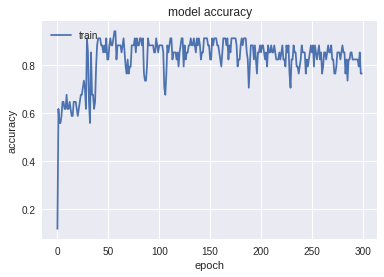

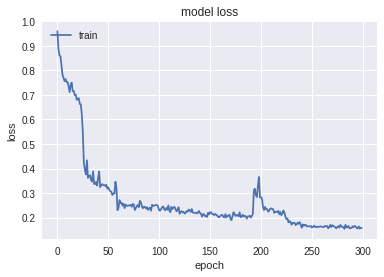

In [353]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [354]:
type(pattern)

midi.containers.Pattern

In [355]:
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("seed:")
#print(pattern)
generate = list()
for i in range(10):
  gx = np.reshape(pattern, (1, len(pattern), 3))
  prediction = model.predict(gx, verbose=0)
  print(prediction)
  generate.append(prediction)
  #print('antes:',pattern)
  pattern = np.concatenate([pattern,prediction])
  pattern = pattern[1:len(pattern)]
  #print('depois:',pattern)
print "\nDone."

seed:
[[ 0.7855881 -0.9987634  0.6932163]]
[[ 0.7636044  0.9996453 -0.9560073]]
[[ 0.77492523 -0.99842674  0.6949536 ]]
[[ 0.7507983   0.99964464 -0.95729566]]
[[ 0.76213145 -0.99838114  0.6984056 ]]
[[ 0.74292785  0.99964005 -0.95745087]]
[[ 0.7550925  -0.9984561   0.70148224]]
[[ 0.740261   0.9996302 -0.9571631]]
[[ 0.75312155 -0.9985417   0.70332897]]
[[ 0.7406095   0.99962187 -0.9567654 ]]

Done.


In [356]:
generate

[array([[ 0.7855881, -0.9987634,  0.6932163]], dtype=float32),
 array([[ 0.7636044,  0.9996453, -0.9560073]], dtype=float32),
 array([[ 0.77492523, -0.99842674,  0.6949536 ]], dtype=float32),
 array([[ 0.7507983 ,  0.99964464, -0.95729566]], dtype=float32),
 array([[ 0.76213145, -0.99838114,  0.6984056 ]], dtype=float32),
 array([[ 0.74292785,  0.99964005, -0.95745087]], dtype=float32),
 array([[ 0.7550925 , -0.9984561 ,  0.70148224]], dtype=float32),
 array([[ 0.740261 ,  0.9996302, -0.9571631]], dtype=float32),
 array([[ 0.75312155, -0.9985417 ,  0.70332897]], dtype=float32),
 array([[ 0.7406095 ,  0.99962187, -0.9567654 ]], dtype=float32)]

In [0]:
inv = scaler.inverse_transform(generate)

In [358]:
inv

array([[[6.9231689e+01, 6.1830878e-04, 6.5122711e+01]],

       [[6.9123634e+01, 9.9982262e-01, 3.7506258e-01]],

       [[6.9179276e+01, 7.8663230e-04, 6.5190918e+01]],

       [[6.9060692e+01, 9.9982232e-01, 3.2448351e-01]],

       [[6.9116394e+01, 8.0943108e-04, 6.5326447e+01]],

       [[6.9022003e+01, 9.9981999e-01, 3.1839144e-01]],

       [[6.9081795e+01, 7.7193975e-04, 6.5447227e+01]],

       [[6.9008896e+01, 9.9981511e-01, 3.2968676e-01]],

       [[6.9072105e+01, 7.2914362e-04, 6.5519730e+01]],

       [[6.9010612e+01, 9.9981093e-01, 3.4530032e-01]]], dtype=float32)

In [359]:
inv.shape

(10, 1, 3)

In [0]:
import midi
# Instantiate a MIDI Pattern (contains a list of tracks)
pattern = midi.Pattern()
pattern.resolution = 128
# Instantiate a MIDI Track (contains a list of MIDI events)
track = midi.Track()
# Append the track to the pattern
pattern.append(track)

In [0]:
for i in inv:
  a, c = int(i.T[0]),int(i.T[2])
  
  b = i.T[1]
  if b > 0.6:
    on = midi.NoteOnEvent(tick=c, velocity=127, pitch=a)
    track.append(on)
  else:
    off = midi.NoteOffEvent(tick=100, pitch=a)
    track.append(off)
eot = midi.EndOfTrackEvent(tick=1) 
track.append(eot)

In [362]:
print(pattern)

midi.Pattern(format=1, resolution=128, tracks=\
[midi.Track(\
  [midi.NoteOffEvent(tick=100, channel=0, data=[69, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[69, 127]),
   midi.NoteOffEvent(tick=100, channel=0, data=[69, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[69, 127]),
   midi.NoteOffEvent(tick=100, channel=0, data=[69, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[69, 127]),
   midi.NoteOffEvent(tick=100, channel=0, data=[69, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[69, 127]),
   midi.NoteOffEvent(tick=100, channel=0, data=[69, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[69, 127]),
   midi.EndOfTrackEvent(tick=1, data=[])])])


In [0]:
midi.write_midifile("musica_gerada.mid", pattern)

In [0]:

from google.colab import files

In [0]:
files.download('musica_gerada.mid')